# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](./readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

In [9]:
import PIL
from PIL import ImageFont, ImageDraw
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')


font_ = ImageFont.truetype("readonly/arial.ttf", size = 25) # download and save arial font in root directroy 
images = [] # empty list for collating all images 
fact_lst = [0.1,0.5,0.9] # factor by which we need to change the color
for fact in fact_lst : 
    my_image = image.copy() # create copy object so that original is avaialble for next editing 
    t1 = 'channel 0 intensity ' + str(fact)
    draw = ImageDraw.Draw(my_image)
    draw.rectangle([0,500,1001,564],fill='black') # creating space for all three images 
    pix = my_image.load() 
    for i_width in range(image.width): #itereare and change only one of R , B,  G with factoe fact 
        for i_height in range(image.height): 
            pix[i_width,i_height] =(int(fact*pix[i_width,i_height][0]),pix[i_width,i_height][1],pix[i_width,i_height][2])    
        draw.text((2,425),t1,font=font_, align ="left")  # put title 
    images.append(my_image)
    # repeating for other set
    my_image = image.copy()
    t1 = 'channel 1 intensity ' + str(fact)
    draw = ImageDraw.Draw(my_image)
    draw.rectangle([0,500,1001,564],fill='black')
    pix = my_image.load()
    for i_width in range(image.width):
        for i_height in range(image.height): 
            pix[i_width,i_height]=(pix[i_width,i_height][0],int(fact*pix[i_width,i_height][1]),pix[i_width,i_height][2])
    draw.text((2,425),t1,font=font_, align ="left")  # put title 
    images.append(my_image)
    #repeating for last  set
    my_image = image.copy()
    t1 = 'channel 2 intensity ' + str(fact)
    draw = ImageDraw.Draw(my_image)
    draw.rectangle([0,500,1001,564],fill='black')
    pix = my_image.load()
    for i_width in range(image.width):
        for i_height in range(image.height): 
            pix[i_width,i_height]=(pix[i_width,i_height][0],pix[i_width,i_height][1],int(fact*pix[i_width,i_height][2]))
    draw.text((2,425),t1,font=font_, align ="left")  # put title 
    images.append(my_image)
#display (images[3]) # testing 

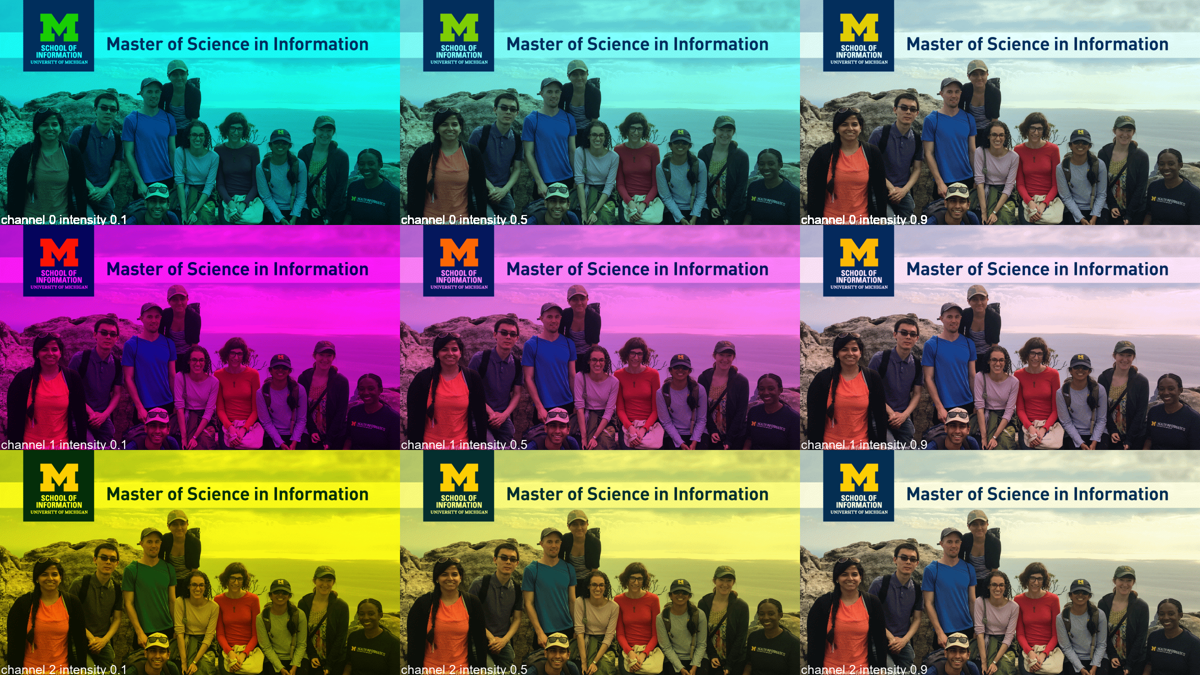

In [10]:
# cropping all images in one set
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
y=0
x=0
for img in images:
    contact_sheet.paste(img, (x, y) )
    if y+first_image.height == contact_sheet.height:
        x=x+first_image.width
        y=0
    else:
        y=y+first_image.height        

contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)


## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.